# Mads Dyrmann, Feb. 2022, ver. 1.1
## ETDIP1 - LAB3: Morphological Algorithms
*Aarhus University*  
*Department of Electrical and Computer Engineering*

In these exercises, you will work with morphological operations. In the first exercise, you have to remove noise from an image, while in the second exercise, you have to count objects.


## Part 1: Remove noise from a thresholded image
In this exercise, you will use morphological operations to remove noise in an image so that only the three insects remain.

1. Open “moth.png” and convert it to grey-scale.
2. Find a suitable threshold, which removes most of the background while keeping the insects as foreground.
3. Use morphological operations to remove noise so that only the three insects remain.

### 1. Open “moth.png” and convert it to grey-scale.

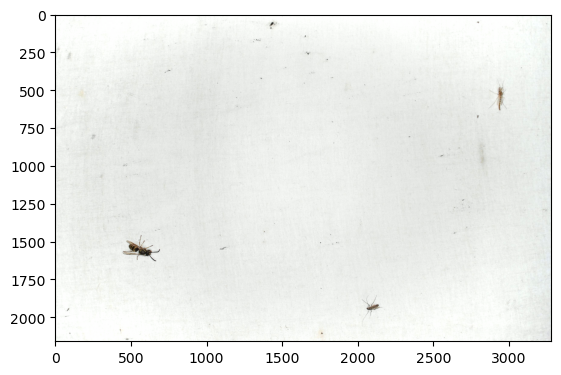

In [41]:
from imageio import imread, imwrite # Library for reading and writing images
from pylab import * # library containing lots of basic functions for data processing
from skimage.util import img_as_ubyte, img_as_float # Convert image between interval ~(0,255) and ~(0,1)
import numpy as np # Library for handling matrices
import matplotlib.pyplot as plt # Library for creating plots
from matplotlib.pyplot import imshow # import imshow directly since we will use it a lot
from skimage.color import rgb2gray
from skimage import measure
from skimage.color import label2rgb
plt.gray()

im = imread('../Images/moth.png')
imshow(im)

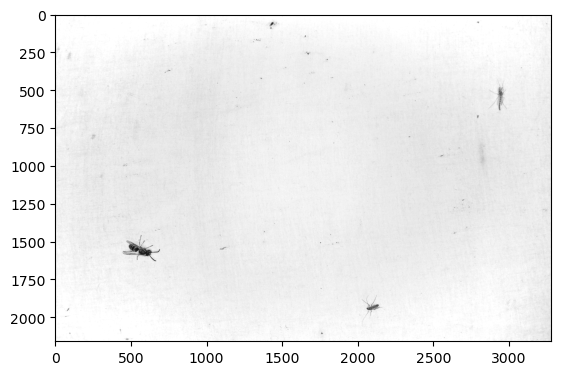

In [42]:
im_gray = rgb2gray(im)
imshow(im_gray)

### 2. Find a suitable threshold, which removes most of the background while keeping the insects as foreground.

In [43]:
from ipywidgets import interact, FloatSlider
from IPython.display import display, clear_output

def update_image(threshold):
    im_bin = (im_gray > threshold) * 255
    plt.imshow(im_bin, cmap='gray')
    plt.title(f"Threshold: {threshold}")
    plt.axis('off')


initial_threshold = 0.75

threshold_slider = FloatSlider(value=initial_threshold, min=0, max=1, step=0.01, description='Threshold')

interact(update_image, threshold=threshold_slider)

threshold = 0.50

im_bin = (im_gray > threshold) * 255

interactive(children=(FloatSlider(value=0.75, description='Threshold', max=1.0, step=0.01), Output()), _dom_cl…

### 3. Use morphological operations to remove noise so that only the three insects remain.

I'm going to invert the image, so that the flies are white and the background is black. This makes it easier to handle, since the built in functions in morphology assumes that the elements are set up this way.

In [ ]:
im_bin = ~im_bin

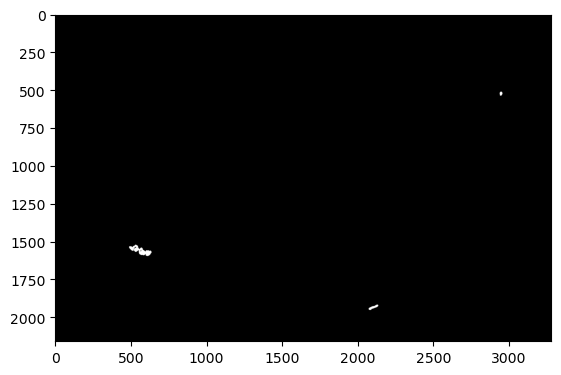

In [63]:
from skimage.morphology import disk, erosion, dilation, opening, closing

selem = disk(6)
im_morph = opening(im_bin,footprint=selem)

imshow(im_morph)

Even though that one of the insects (top right) becomes very small and hard to see, we now have only the insects in the picture. If the goal was to count the insects, this would be possible now

## Part 2: Count the rice
Create a program that detects and counts the rice grains in the image “rice.tif”.

1. Convert the image to black and white. (You could try experimenting with Otsu’s method)
2. Extract all the connected components by implementing the connected component algorithm (pp. 645–647 in GW 3rd edition, pp. 655–657 in GW 4th edition) (try both 4- and 8-connectivity).
3. Count the number of rice grains.

### 1. Convert the image to black and white. (You could try experimenting with Otsu’s method)


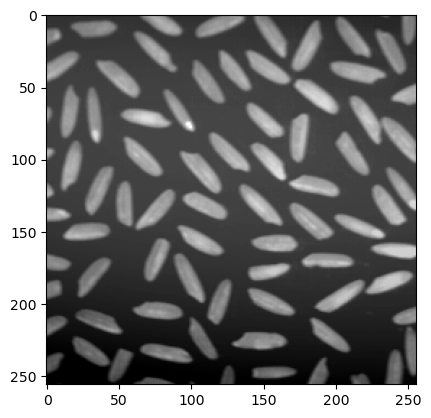

In [64]:
im = imread('../Images/rice.tif')
imshow(im)

In [65]:
from skimage.filters import threshold_otsu, rank

radius = 15
selem = disk(radius)
local_otsu = rank.otsu(im, selem)
threshold_global_otsu = threshold_otsu(im)
global_otsu = im >= threshold_global_otsu

imshow(im)

TypeError: 'numpy.ndarray' object is not callable